<a href="https://colab.research.google.com/github/jayanimalik/DL-tensorflow/blob/main/deep_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt

In [3]:
import imghdr

In [4]:
happy='/content/drive/MyDrive/data/happy'
sad='/content/drive/MyDrive/data/sad'

In [5]:
image_exts=['jpeg','jpg','bmp','png']

In [6]:
img = cv2.imread('/content/drive/MyDrive/data/happy/1-2.jpg')

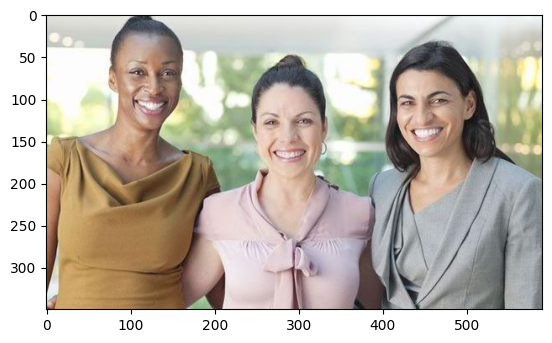

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [7]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')

Found 305 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
#image represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

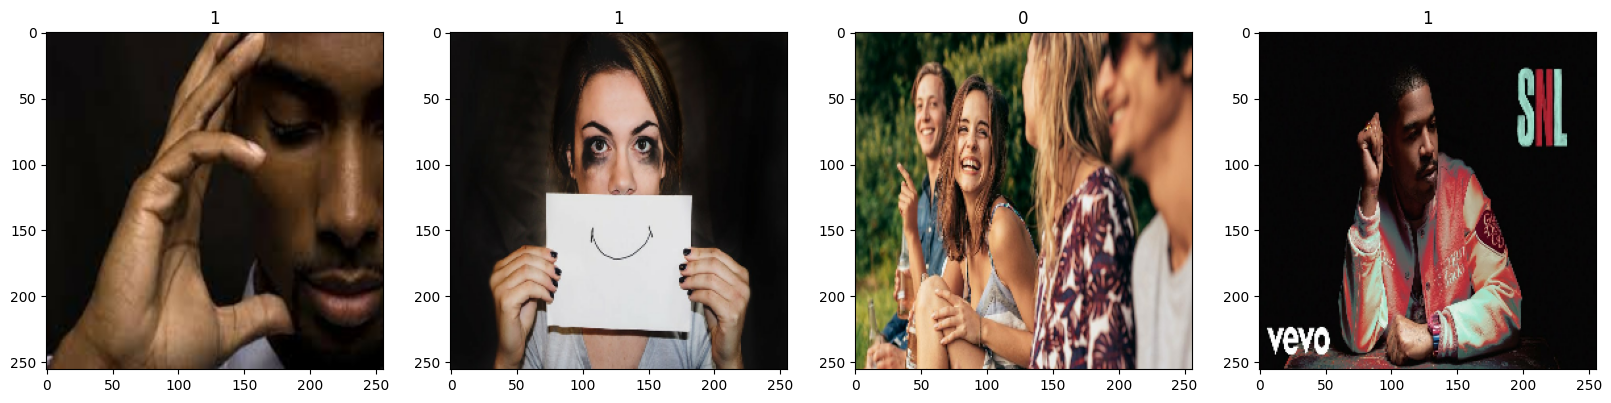

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocess data

In [8]:
data=data.map(lambda x,y: (x/255,y))

In [9]:
scaled_iterator=data.as_numpy_iterator()

In [10]:
batch=scaled_iterator.next()

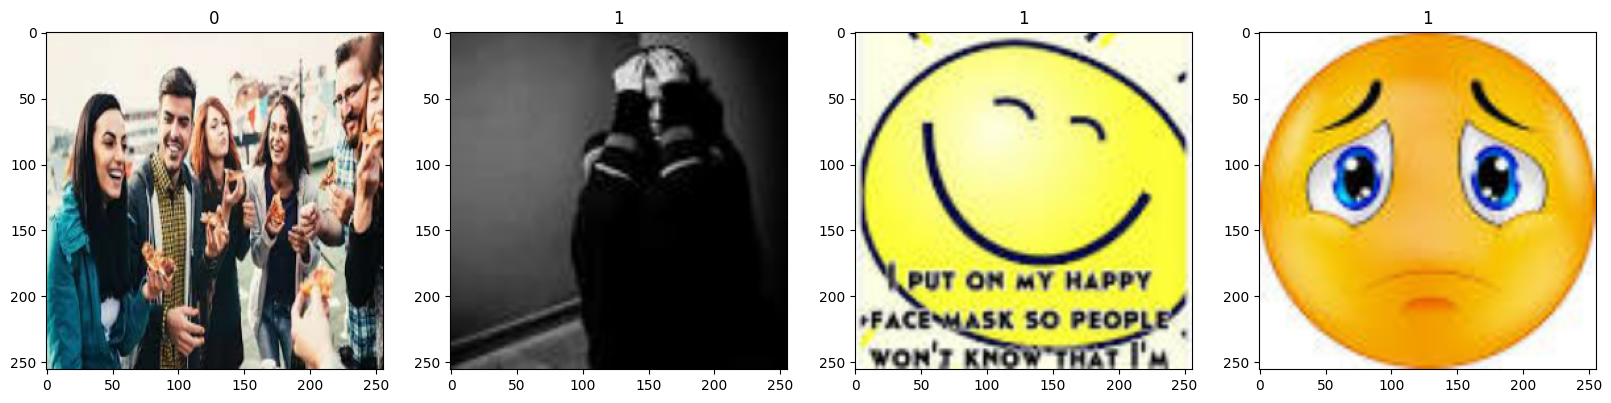

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

split data

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) #validation
test_size = int(len(data)*.1)

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

build DL model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [14]:
model= Sequential()

In [15]:
# 16 filters
model.add(Conv2D(16,(3,3),1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu')) # fully connected
model.add(Dense (1, activation='sigmoid'))

In [16]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Training the model

In [18]:
logdir='logs'

In [19]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [20]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 15s 599ms/step - loss: 0.7480 - accuracy: 0.5089 - val_loss: 0.6414 - val_accuracy: 0.5625
Epoch 2/20
7/7 [==============================] - 7s 613ms/step - loss: 0.6334 - accuracy: 0.5312 - val_loss: 0.5694 - val_accuracy: 0.7188
Epoch 3/20
7/7 [==============================] - 7s 608ms/step - loss: 0.6096 - accuracy: 0.7009 - val_loss: 0.5434 - val_accuracy: 0.7031
Epoch 4/20
7/7 [==============================] - 7s 700ms/step - loss: 0.5164 - accuracy: 0.8482 - val_loss: 0.4581 - val_accuracy: 0.8125
Epoch 5/20
7/7 [==============================] - 7s 629ms/step - loss: 0.3834 - accuracy: 0.8750 - val_loss: 0.3151 - val_accuracy: 0.8594
Epoch 6/20
7/7 [==============================] - 10s 973ms/step - loss: 0.3346 - accuracy: 0.8795 - val_loss: 0.2917 - val_accuracy: 0.9375
Epoch 7/20
7/7 [==============================] - 7s 796ms/step - loss: 0.2092 - accuracy: 0.9688 - val_loss: 0.1126 - val_accuracy: 0.9844
Epoch 8/20
7/7 [==

In [ ]:
hist.history

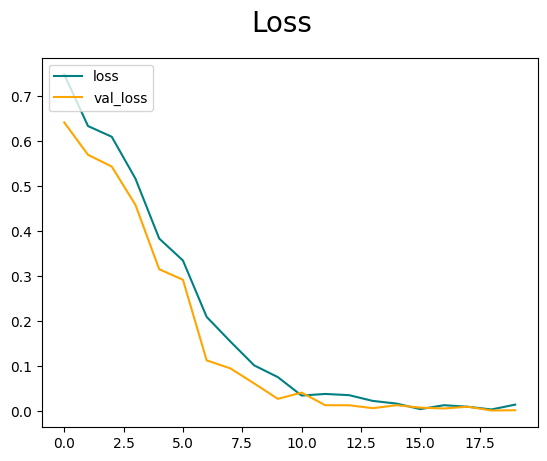

In [21]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

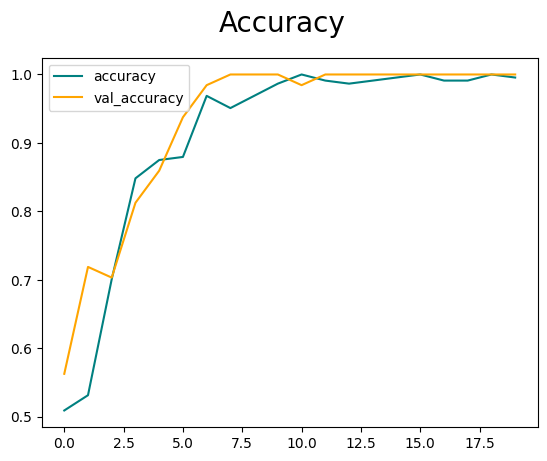

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluation of the model

In [24]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [25]:
pre= Precision()
re=Recall()
acc=BinaryAccuracy()

In [26]:
len(test)

1

In [27]:
for batch in test.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 1s 502ms/step


In [28]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


Save the model

In [29]:
from tensorflow.keras.models import load_model

In [30]:
model.save(os.path.join('models','happysadmodel.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
